# Análise de Opiniões sobre Livros com Python

## Etapa 1 - Importação de Bibliotecas

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import spacy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

import string
import random
import re
import math

from bs4 import BeautifulSoup

from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [102]:
tf.__version__

'2.14.0'

## Etapa 2 - Pré-processamento dos dados

### Carregamento dos dados

In [103]:
import pandas as pd

caminho_do_arquivo = './train/utlc_movies.csv'
cols = ["review_text_tokenized", "polarity"]
train_data  = pd.read_csv(caminho_do_arquivo)


In [104]:
train_data.drop(['original_index', 'review_text', 
       'review_text_tokenized', 'rating', 'kfold_polarity',
       'kfold_rating'], axis=1, inplace=True)

In [105]:
train_data.fillna(0, inplace=True)

In [106]:
train_data.polarity.unique()

array([1., 0.])

<Axes: xlabel='polarity', ylabel='count'>

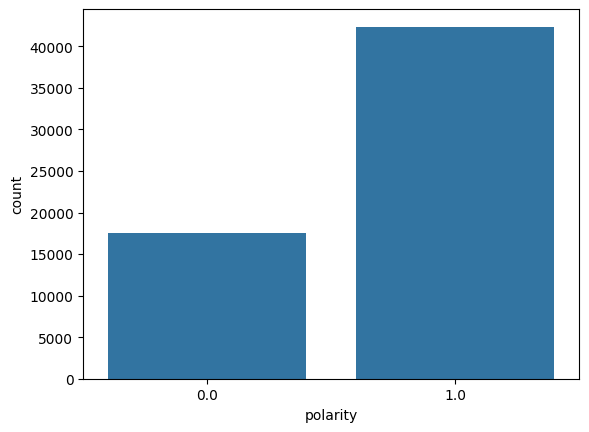

In [107]:
sns.countplot(train_data, x="polarity")

In [108]:
train_data["polarity"].value_counts()

polarity
1.0    42356
0.0    17527
Name: count, dtype: int64

### Limpeza dos dados

In [109]:
data = train_data
data.columns

Index(['review_text_processed', 'polarity'], dtype='object')

In [110]:
X = data.iloc[1:, 0].values
X

array(['o filme e realmente diferente e bem lento mas nao de uma forma ruim ou entediante, e muito interessante e chama atencao desde o inicio nos mantendo atentos ate o final. a atuacao da amy adams e muito boa e aqui onde ela realmente merecia uma indicacao ao oscar infelizmente foi esnobada, jeremy renner tambem esta otimo como sempre. fotografia muito boa e todas as tecnicas de som sao perfeitas, mereceu o oscar por melhor edicao de som porque e simplesmente perfeito o trabalho que fizeram com o som deste filme, quando os aliens se comunicam com a louise e fascinante. na minha opiniao nao e um filme convencional sobre ataque alienigena, e muito mais profundo que isso focando muito no drama, nao espere acao de "a chegada" porque definitivamente nao e um filme ao estilo "guerra dos mundos" e "independence day" (apesar de eu gostar de ambos os filmes citados), e realmente um drama psicologico bem intenso que nos mostra como a mente humana e limitada achando que tudo aquilo que e desco

In [111]:
X.shape

(59882,)

In [112]:
type(X)

numpy.ndarray

In [113]:
y = data.iloc[1:, 1].values
y.shape

(59882,)

In [114]:
from sklearn.model_selection import train_test_split

X, _, y,_ = train_test_split(X, y, test_size = 0.85, stratify = y)   

In [115]:
y.shape, X.shape

((8982,), (8982,))

In [116]:
unique, counts = np.unique(y, return_counts=True)
unique, counts 

(array([0., 1.]), array([2629, 6353]))

In [117]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    
    tweet = re.sub(r'@', ' ', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = tweet.replace("htt", "").replace("\n", "")
    tweet = re.sub(r' +', ' ', tweet)
    
    return tweet

In [118]:
text = data.iloc[2500, 0]
text

'agora posso falar: chega dia 26! chega! *---------*'

In [119]:
text = clean_tweet(text)
text

'agora posso falar: chega dia ! chega! *---------*'

In [120]:
# Retirando stopwords

nlp = sp.load("pt_core_news_sm")
nlp

In [121]:
stop_words = sp.lang.pt.STOP_WORDS
print(stop_words)
len(stop_words)

{'então', 'catorze', 'desse', 'quais', 'bem', 'pouco', 'dezanove', 'meio', 'oito', 'quatro', 'dezassete', 'esse', 'mil', 'daquela', 'seria', 'sou', 'local', 'quarta', 'mês', 'nossa', 'dizer', 'foram', 'meses', 'sempre', 'conhecida', 'nesse', 'dizem', 'isto', 'vezes', 'cinco', 'novo', 'possivelmente', 'aquelas', 'aqui', 'vos', 'você', 'e', 'de', 'quieto', 'dezoito', 'iniciar', 'tua', 'à', 'pois', 'qual', 'pôde', 'exemplo', 'sabe', 'acerca', 'porquê', 'conhecido', 'todas', 'são', 'onze', 'fim', 'próxima', 'põem', 'apoio', 'vinda', 'povo', 'fui', 'ou', 'tivemos', 'põe', 'atrás', 'tanto', 'geral', 'puderam', 'dá', 'boa', 'vocês', 'for', 'ambas', 'neste', 'te', 'grande', 'diz', 'ver', 'final', 'área', 'posição', 'aquela', 'bom', 'menos', 'ali', 'cá', 'tiveram', 'dois', 'foi', 'pela', 'sexto', 'minhas', 'ambos', 'inicio', 'devem', 'antes', 'estou', 'estivestes', 'outros', 'todos', 'tempo', 'nas', 'ponto', 'os', 'porque', 'muito', 'toda', 'cedo', 'ele', 'o', 'dão', 'relação', 'questão', 'aind

416

In [122]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
def clean_tweet2(tweet):
    tweet = tweet.lower()
    document = nlp(tweet)
    
    words = []
    for token in document:
        words.append(token.text)
    
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = ' '.join([str(element) for element in words])
    return words

In [124]:
text2 = clean_tweet2(text)
text2

'falar chega dia chega ---------'

In [125]:
# Aplicando em tudo
data_clean = [clean_tweet2(clean_tweet(tweet)) for tweet in X]
data_clean


/tmp/ipykernel_615/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
/tmp/ipykernel_615/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


['guardioes galaxia melhor filme marvel ate personagens desenvolvidos trabalhados personalidade comportamentos curiosamente peculiares fica ate dificil escolher preferido fato nao entenderem girias terraqueas ditas peter quill otima sacada tambem cenas acao perseguicao sao eletrizantes filme ritmo alucinante prende jeito inacreditavel rocket raccoon groot ficaram otimos sejam duplas personagens carismaticas ultimos tempos bradley cooper realmente trabalho voz formidavel rocket trilha sonora fosse personagem tao charmosa excepcional e. achei otimo referencias fizeram anos referencias homenagens universo star wars ansioso guardioes galaxia vol amanha p.s compraria facil trilha sonora fita cassete junto walkman tematico',
 'linda releitura obra prima literatura teatro brasileiro ariano suassuna filme aborda maestria detalhes producoes abordadas livro elenco melhores atuacoes sao dignas oscar vida sertao nordestina complicada cheia perigos filme capacidade mostrar lados positivos negativos

In [126]:
data_labels = y
data_labels

array([1., 1., 1., ..., 0., 1., 0.])

In [127]:
np.unique(data_labels)

array([0., 1.])

### Tokenização

In [128]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size = 2**16)

In [129]:
2**16 # Vocabulario

65536

In [130]:
tokenizer.vocab_size

26655

In [131]:
print(tokenizer.subwords)

['filme_', 'nao_', 'pra_', ' ... ', 'historia_', 'ja_', 'melhor_', 'so_', 'filmes_', 'sao_', 'ate_', 'tao_', 'filme', 'achei_', 'roteiro_', 'vida_', 'trilha_', 'cenas_', 'tambem_', 'gostei_', 'voce_', 'personagens_', 'personagem_', 'cinema_', 'atuacao_', 'sonora_', 'acho_', 'assistir_', 'cena_', ' ...', 'realmente_', 'atuacoes_', 'otimo_', 'fotografia_', 'vi_', 'pessoas_', 'livro_', 'melhores_', 'lindo_', 'mundo_', 'alem_', 'vale_', 'excelente_', 'incrivel_', 'cara_', 'apesar_', 'acao_', 'dele_', 'anos_', 'porem_', 'efeitos_', 'pena_', 'direcao_', 'obra_', 'mim_', 'interessante_', 'coisas_', ' .. ', 'ha_', 'la_', 'momentos_', 'quase_', 'q_', 'fiquei_', 'tinha_', 'simplesmente_', 'assisti_', 'sendo_', 'fica_', 'gente_', 'seja_', 'poderia_', 'muita_', 'atores_', 'amor_', 'diretor_', 'perfeito_', 'elenco_', 'legal_', 'the_', 'consegue_', 'entao_', 'ai_', 'super_', 'ta_', 'otima_', 'oscar_', 'trama_', 'ficou_', 'outro_', 'fato_', 'deixa_', ' “ ', 'hoje_', 'o_', 'diferente_', 'principalment

In [132]:
# Cada plavara terá um enconding para passar ao algoritmos
ids = tokenizer.encode("eu amo este livro")
ids

[692, 167, 7531, 556]

In [133]:
text = tokenizer.decode(ids)
text

'eu amo este livro'

In [134]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]
data_inputs

[[3146,
  2805,
  7,
  1,
  186,
  11,
  22,
  2145,
  1902,
  815,
  3699,
  6037,
  4596,
  69,
  11,
  162,
  1293,
  1132,
  91,
  2,
  10848,
  10423,
  13433,
  5976,
  636,
  6728,
  86,
  1397,
  19,
  18,
  47,
  2458,
  10,
  21648,
  1,
  307,
  6265,
  243,
  295,
  3554,
  4502,
  9131,
  3147,
  669,
  278,
  840,
  21761,
  22,
  7983,
  445,
  310,
  2011,
  646,
  31,
  149,
  536,
  5811,
  4502,
  17,
  26,
  127,
  23,
  12,
  11544,
  1040,
  26500,
  103,
  14,
  33,
  553,
  454,
  49,
  553,
  4753,
  226,
  720,
  1008,
  1178,
  3146,
  2805,
  5139,
  8203,
  26511,
  26445,
  217,
  23407,
  477,
  17,
  26,
  2817,
  6124,
  324,
  12475,
  13500],
 [132,
  4524,
  54,
  264,
  2277,
  2047,
  1000,
  25225,
  13801,
  1,
  1761,
  1573,
  317,
  843,
  26188,
  37,
  78,
  38,
  32,
  10,
  3657,
  87,
  16,
  8842,
  16826,
  2881,
  956,
  16178,
  1,
  836,
  245,
  1581,
  1672,
  1944,
  1844,
  98,
  1223,
  1682,
  18,
  1604,
  504,
  868,
  21139,

### Padding

In [135]:
# Preenchimento das sentenças, deixando tudo do mesmo tamanho
max_len = max(len(sentence) for sentence in data_inputs)
max_len

1120

In [136]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    data_inputs,
    value = 0,
    padding = 'post',
    maxlen=max_len
)
data_inputs

array([[3146, 2805,    7, ...,    0,    0,    0],
       [ 132, 4524,   54, ...,    0,    0,    0],
       [7007, 2314, 2414, ...,    0,    0,    0],
       ...,
       [   1, 4128,  129, ...,    0,    0,    0],
       [   2,  169,    9, ...,    0,    0,    0],
       [8273,    1,  140, ...,    0,    0,    0]], dtype=int32)

### Divisão da base de dados em treinamento e teste

In [137]:
train_inputs, test_inputs, trains_labels, test_labels = train_test_split(
    data_inputs,
    data_labels,
    test_size=0.1,
    stratify = data_labels
)

In [138]:
train_inputs[0]

array([ 1872,   849, 25202, ...,     0,     0,     0], dtype=int32)

In [139]:
train_inputs.shape

(8083, 1120)

In [140]:
trains_labels.shape

(8083,)

In [141]:
test_inputs.shape

(899, 1120)

In [142]:
test_labels.shape

(899,)

In [143]:
len(set(trains_labels))

2

## Construção do Modelo

In [144]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

    self.pool = layers.GlobalMaxPool1D()

    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # (batch_size, 3 * nb_filters)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output
        

In [145]:
tokenizer.vocab_size

26655

## Treinamento

In [146]:
vocab_size = tokenizer.vocab_size
vocab_size

26655

In [147]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
nb_classes = len(set(trains_labels))
dropout_rate = 0.2
nb_epochs = 10
batch_size = 64

In [148]:
Dcnn = DCNN(
    vocab_size=vocab_size, 
    emb_dim=emb_dim, 
    nb_filters=nb_filters, 
    ffn_units=ffn_units, 
    nb_classes=nb_classes, 
    dropout_rate=dropout_rate)

In [149]:
if nb_classes == 2:
    print("Duas Classes")
    Dcnn.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

Duas Classes


In [150]:
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint  restored')

In [151]:
history = Dcnn.fit(
    train_inputs, 
    trains_labels, 
    batch_size=batch_size,
    epochs=nb_epochs, 
    verbose=1, 
    validation_split=0.10
)

ckpt_manager.save()

Epoch 1/10


114/114 [==============================] - 62s 526ms/step - loss: 0.5798 - accuracy: 0.7106 - val_loss: 0.5355 - val_accuracy: 0.7367
Epoch 2/10
114/114 [==============================] - 63s 553ms/step - loss: 0.3464 - accuracy: 0.8574 - val_loss: 0.5423 - val_accuracy: 0.7590
Epoch 3/10
114/114 [==============================] - 62s 541ms/step - loss: 0.1050 - accuracy: 0.9673 - val_loss: 0.7400 - val_accuracy: 0.7379
Epoch 4/10
114/114 [==============================] - 62s 546ms/step - loss: 0.0460 - accuracy: 0.9834 - val_loss: 0.8307 - val_accuracy: 0.7268
Epoch 5/10
114/114 [==============================] - 66s 579ms/step - loss: 0.0342 - accuracy: 0.9868 - val_loss: 0.9766 - val_accuracy: 0.7318
Epoch 6/10
114/114 [==============================] - 64s 565ms/step - loss: 0.0280 - accuracy: 0.9868 - val_loss: 0.9988 - val_accuracy: 0.7256
Epoch 7/10
114/114 [==============================] - 66s 577ms/step - loss: 0.0253 - accuracy: 0.9885 - val_loss: 1.1232 - val_accuracy: 0.7

'./ckpt-1'

## Avaliação

In [152]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

15/15 [==============================] - 2s 140ms/step - loss: 1.2351 - accuracy: 0.7186
[1.2351481914520264, 0.718576192855835]


In [153]:
y_pred_test = Dcnn.predict(test_inputs)

29/29 [==============================] - 2s 73ms/step


In [154]:
y_pred_test

array([[6.84266761e-02],
       [9.99636590e-01],
       [9.99969900e-01],
       [3.05327885e-05],
       [8.55614126e-01],
       [1.45146037e-02],
       [9.99249101e-01],
       [3.58967125e-01],
       [7.60928929e-01],
       [9.96553123e-01],
       [7.73228049e-01],
       [7.63434589e-01],
       [5.32639725e-03],
       [7.04942830e-03],
       [9.99956667e-01],
       [9.74640965e-01],
       [9.94087756e-01],
       [1.49995787e-02],
       [9.99512970e-01],
       [9.96311367e-01],
       [9.79780793e-01],
       [1.00000000e+00],
       [9.97902989e-01],
       [9.99001443e-01],
       [3.62621690e-03],
       [1.55058093e-02],
       [9.71361995e-01],
       [6.82341039e-01],
       [1.87019315e-02],
       [9.99417961e-01],
       [9.91424084e-01],
       [3.27464268e-02],
       [3.53167914e-02],
       [9.59830880e-01],
       [9.99508739e-01],
       [9.99943256e-01],
       [9.99595582e-01],
       [9.38168705e-01],
       [1.14495560e-05],
       [9.88388598e-01],


In [155]:
y_pred_test = (y_pred_test > 0.5)

In [156]:
y_pred_test

array([[False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [157]:
test_labels

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1.

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[129, 134],
       [119, 517]])

<Axes: >

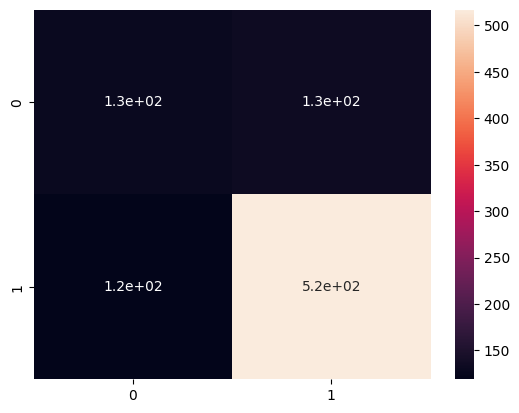

In [159]:
sns.heatmap(cm, annot=True)

In [160]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

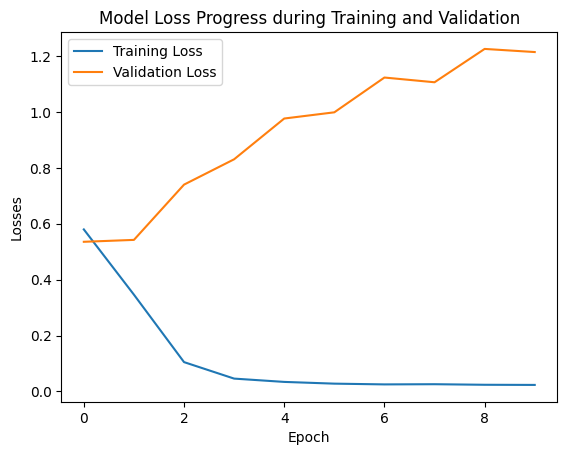

In [161]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss Progress during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training Loss', 'Validation Loss'])

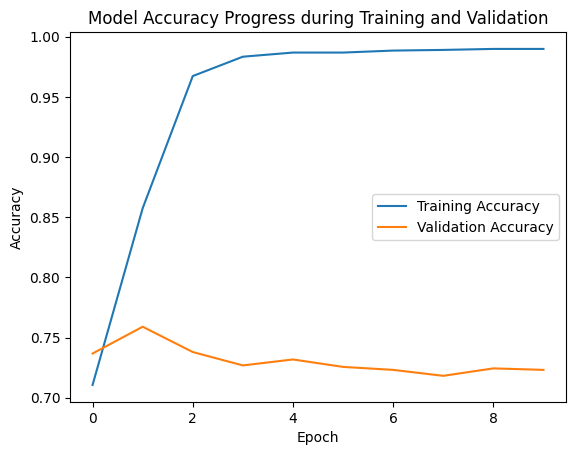

In [162]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy Progress during Training and Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

## Previsões

In [163]:
text = """uma bosta, uma merda"""

text = clean_tweet2(clean_tweet(text))


text = tokenizer.encode(text)
text

[1750, 2487]

In [164]:
prev = Dcnn(np.array([text]), training=False).numpy()


print(prev)
print(np.argmax(prev, axis=1))
print(np.argmin(prev, axis=1))



[[0.00166223]]
[0]
[0]


In [165]:
weights_save_path = './model'
Dcnn.save_weights(weights_save_path)

In [166]:
weights_path = './model'
Dcnn.load_weights(weights_path)

In [167]:
model_save_path = './model'
Dcnn.save(model_save_path)

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


In [168]:
converter = tf.lite.TFLiteConverter.from_keras_model(Dcnn)
tflite_model = converter.convert()
tflite_save_path = './model/modelo.tflite'
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_model)

print("Modelo treinado exportado com sucesso!")

INFO:tensorflow:Assets written to: /tmp/tmpctcs1icq/assets


INFO:tensorflow:Assets written to: /tmp/tmpctcs1icq/assets


Modelo treinado exportado com sucesso!


2023-11-21 07:09:42.115662: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-21 07:09:42.115776: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-21 07:09:42.117369: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpctcs1icq
2023-11-21 07:09:42.118705: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-21 07:09:42.118726: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpctcs1icq
2023-11-21 07:09:42.121735: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2023-11-21 07:09:42.122856: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-21 07:09:42.214570: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpctcs1icq
2023-11